# Global Data Analysis w/ Python [2023]

Data source, Kaggle 15/08/23: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023
'Global Country Information Dataset 2023'.

In [219]:
# Introduction:
# This analysis explores various factors from a dataset containing global data for the year 2023.
# The goal is to gain insights into relationships between birth rates, fertility rates, infant mortality,
# life expectancy, physician availability, and population across different countries.

In [220]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Load the dataset from a CSV file
df = pd.read_csv('world-data-2023.csv')

In [222]:
# Display the first few rows of the dataset
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [223]:
df.shape

(195, 35)

# Data Cleaning and Preparation

In [224]:
# Since there are 35 Columns, I will reduce the size of this data set, and clean the sub-set
# based on features I want to explore
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [225]:
df = df[['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy','Physicians per thousand','Population']]

In [226]:
df.head()
df.shape

(195, 7)

In [227]:
# Inital exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  195 non-null    object 
 1   Birth Rate               189 non-null    float64
 2   Fertility Rate           188 non-null    float64
 3   Infant mortality         189 non-null    float64
 4   Life expectancy          187 non-null    float64
 5   Physicians per thousand  188 non-null    float64
 6   Population               194 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


## The following columns have missing values:

Birth Rate

Fertility Rate

Infant mortality

Life expectancy

Physicians per thousand

Population (currently of object type due to the presence of commas in the numbers).

In [228]:
# Convert 'Population' to strings before replacing commas
df['Population'] = df['Population'].astype(str).str.replace(',', '')

# Convert 'Population' to numeric with 'coerce' option
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Columns to impute
columns_to_impute = ['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Physicians per thousand', 'Population']

# Impute missing values with column medians
median_values = df[columns_to_impute].median(numeric_only=True)
df[columns_to_impute] = df[columns_to_impute].fillna(median_values)

In [229]:
# Rename columns for consistency
df.rename(columns={'Birth Rate': 'Birth_Rate'},inplace = True)
df.rename(columns={'Fertility Rate': 'Fertility_Rate'},inplace = True)
df.rename(columns={'Infant mortality': 'Infant_Mortality'},inplace = True)
df.rename(columns={'Life expectancy': 'Life_Expectancy'},inplace = True)
df.rename(columns={'Physicians per thousand': 'Physicians_Per_Thousand'},inplace = True)
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_Mortality',
       'Life_Expectancy', 'Physicians_Per_Thousand', 'Population'],
      dtype='object')

# Visualisations

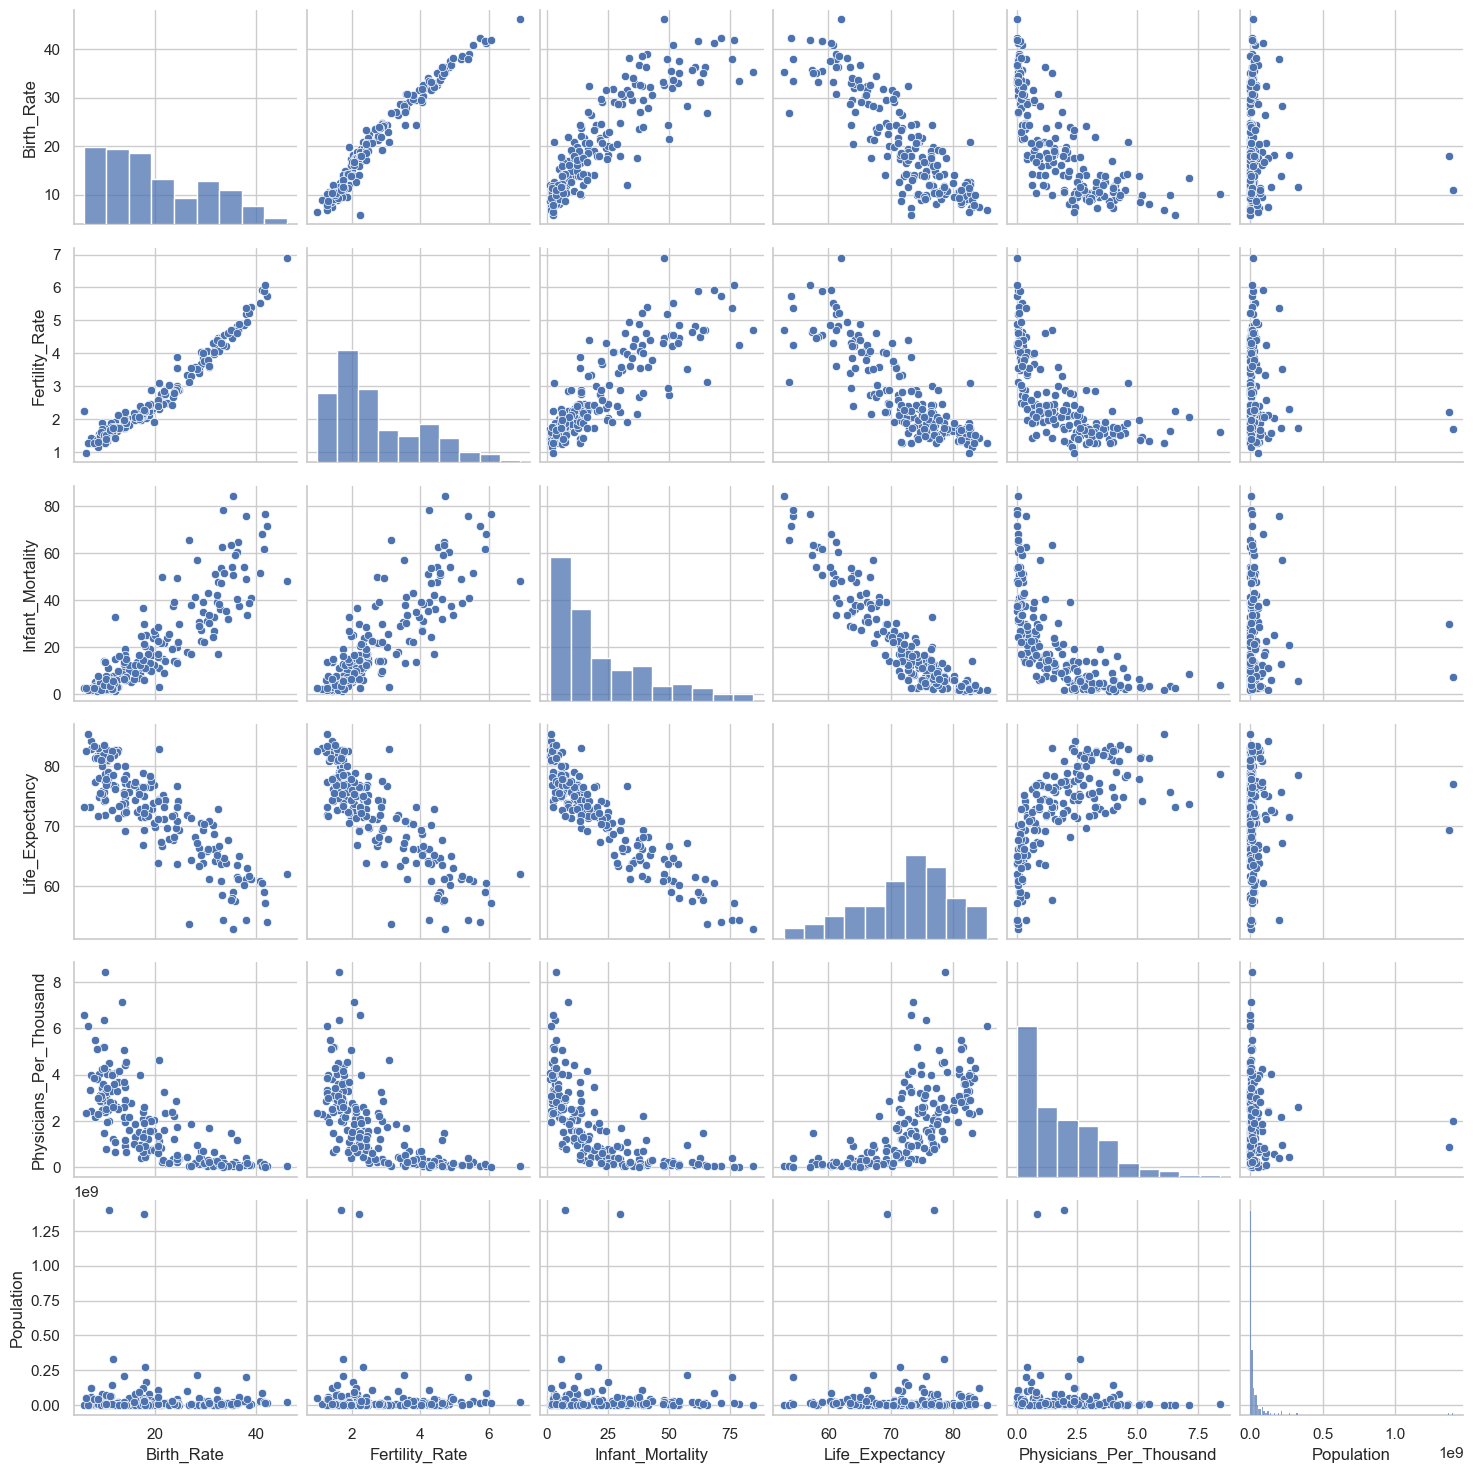

In [230]:
# Display pair plots to explore correlations
sns.pairplot(df)

## This demonstrates some intresting and strong correlations between features of the dataset.

/var/folders/bl/btjq4x_n7vd0dczz0t04g5wh0000gn/T/ipykernel_54116/1385615323.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

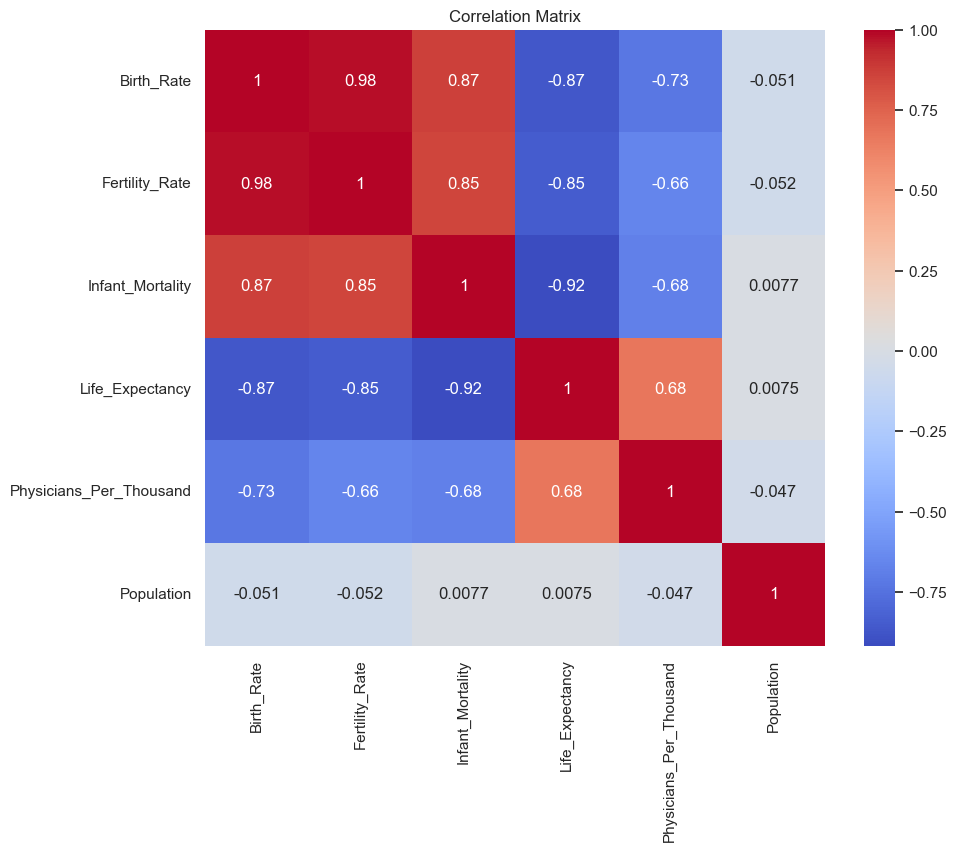

In [231]:
# let's explore some of this further

# Calculate and display correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

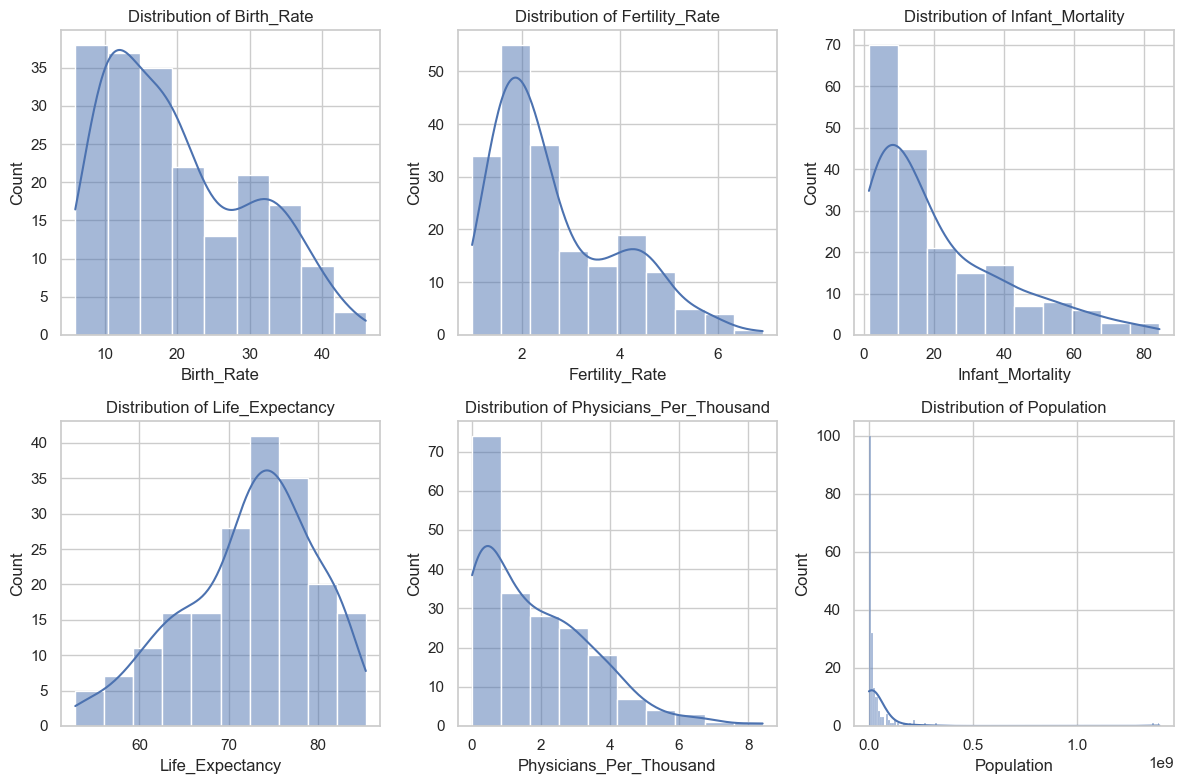

In [232]:
# Display distribution histograms for each column
plt.figure(figsize=(12, 8))

for column in df.columns[1:]:
    plt.subplot(2, 3, df.columns.get_loc(column))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()


Text(0.5, 1.0, 'Scatter Plot: Birth Rate vs. Life Expectancy')

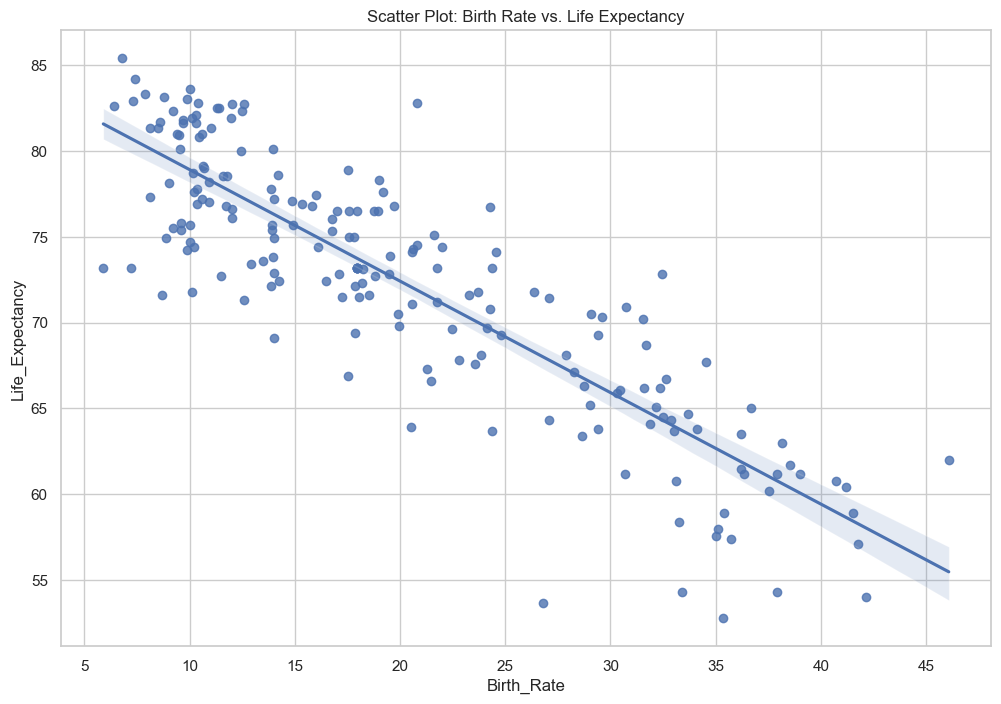

In [233]:
# Display scatter plot of Birth Rate vs. Life Expectancy
plt.figure(figsize=(12, 8))

sns.regplot(data=df, x='Birth_Rate', y='Life_Expectancy')
plt.title('Scatter Plot: Birth Rate vs. Life Expectancy')

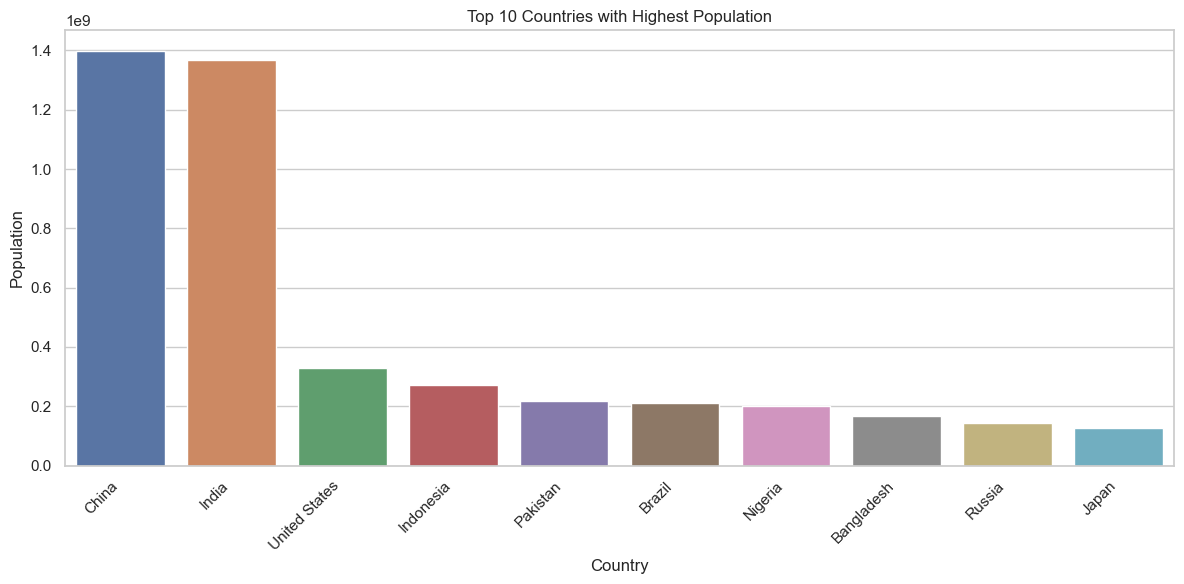

In [234]:
# Display top 10 countries with highest population
top_population_countries = df.nlargest(10, 'Population')

# Set up the style and context for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
ax = sns.barplot(x='Country', y='Population', data=top_population_countries)

# Customise the plot
ax.set_title(f"Top {10} Countries with Highest Population")
ax.set_xlabel("Country")
ax.set_ylabel("Population")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Grouping and Calculations

In [235]:
# Calculate and display average fertility rates by country
Avg_fertility_by_currency = df.groupby('Country')['Fertility_Rate'].mean()

print("Average Fertility Rate by Currency Code:")
print(Avg_fertility_by_currency)


Average Fertility Rate by Currency Code:
Country
Afghanistan    4.47
Albania        1.62
Algeria        3.02
Andorra        1.27
Angola         5.52
               ... 
Venezuela      2.27
Vietnam        2.05
Yemen          3.79
Zambia         4.63
Zimbabwe       3.62
Name: Fertility_Rate, Length: 195, dtype: float64


In [236]:
# Calculate and display countries with the highest life expectancy
Highest = df.groupby('Country')['Life_Expectancy'].max().nlargest(5)
print(Highest)

Country
San Marino     85.4
Japan          84.2
Switzerland    83.6
Spain          83.3
Singapore      83.1
Name: Life_Expectancy, dtype: float64


In [237]:
# Calculate and display countries with the lowest life expectancy
Lowest = df.groupby('Country')['Life_Expectancy'].min().nsmallest(5)
print(Lowest)


Country
Central African Republic    52.8
Lesotho                     53.7
Chad                        54.0
Nigeria                     54.3
Sierra Leone                54.3
Name: Life_Expectancy, dtype: float64


In [238]:
# Compare birth rates with fertility rates
birth_fertility_comparison = df[['Country', 'Birth_Rate', 'Fertility_Rate']]
print(birth_fertility_comparison.head())



       Country  Birth_Rate  Fertility_Rate
0  Afghanistan       32.49            4.47
1      Albania       11.78            1.62
2      Algeria       24.28            3.02
3      Andorra        7.20            1.27
4       Angola       40.73            5.52


In [239]:
# Compare life expectancy with physicians per thousand
life_physicians_comparison = df[['Country', 'Life_Expectancy', 'Physicians_Per_Thousand']]
print(life_physicians_comparison.head())

       Country  Life_Expectancy  Physicians_Per_Thousand
0  Afghanistan             64.5                     0.28
1      Albania             78.5                     1.20
2      Algeria             76.7                     1.72
3      Andorra             73.2                     3.33
4       Angola             60.8                     0.21
